<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#practical_plan">Practical plan and data description</a></li>
        <li><a href="#reading_data">Reading the data </a></li>
        <li><a href="#understanding_data">Understanding the Data</a></li>
        <li><a href="#plot_mitosis">Task 1: Simple plot</a></li>
        <li><a href="#plot_class">Task 2: Plotting the class distribution</a></li>
        <li><a href="#preparing_data">Preparing the data for classification </a></li>
        <li><a href="#encode_data">Task 2: Encode the outcome variable using Scikit learn </a></li>
    </ol>
</div>
<br>
<hr>

<h2 id="practical_plan">Practical plan and data description</h2>


- Today we'll look into 'getting familiar' with cohort data as a warm-up activity. This practical will get you familiar with the dataset used in today's later practicals. You will also prepare the dataset for application of machine learning. We will use the Wisconson breast cancer dataset available at the UCI Machine Learning repository.

- This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg: https://www.cc.gatech.edu/projects/disl/VISTA/breast.html

- Dataset description:  the dataset was provided by the University Medical Centre,
   Institute of Oncology, Ljubljana, Yugoslavia, and has repeatedly appeared in the machine learning literature. 
    - The data set includes 699.
    - There are two classes: 
        - Benign 
        - Malignant 
    - The samples are described by 9 attributes (features), given below with their value range: 
        1. Clump Thickness 1-10
        2. Uniformity of Cell Size 1-10
        3. Uniformity of Cell Shape 1-10
        4. Marginal Adhesion 1-10
        5. Single Epithelial Cell Size 1-10
        6. Bare Nuclei 1-10
        7. Bland Chromatin 1-10
        8. Normal Nucleoli 1-10
        9. Mitoses 1-10

- We will perform record manipulation to explore the different dimensions of the dataset, as well as summary statistics and plotting. 

<h2 id="reading_data">Reading Data </h2>

### Import Python libraries
1. Pandas is for data handling
2. MatPlotLib is for making plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Before you begin
#### - Make sure you know the full path to breast-w_csv..csv

The path below is my version. 


In [2]:
path_to_file ="/home/changhyun/workspace/ml_bioinfo_hi/topic1/breast-w_csv.csv"
bc_data = pd.read_csv(path_to_file, encoding='utf-8')

<h2 id="understanding_data">Understanding the data</h2>

- Let's first examine the variables (features present in the data, and understand what each means

In [3]:
bc_data.head() 

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign


- The .describe() function returns summary statistics of the columns (features). Not all measures are informative (e.g. it is not informative to know that the total count of clumbp_thickness is 699). 

- info() enables finding out the names and types of each of the feature columns. In our case, 8 features are integers and one is float (real number). The class (target) variable is a string (type object, in python)

In [4]:
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Clump_Thickness        699 non-null    int64  
 1   Cell_Size_Uniformity   699 non-null    int64  
 2   Cell_Shape_Uniformity  699 non-null    int64  
 3   Marginal_Adhesion      699 non-null    int64  
 4   Single_Epi_Cell_Size   699 non-null    int64  
 5   Bare_Nuclei            683 non-null    float64
 6   Bland_Chromatin        699 non-null    int64  
 7   Normal_Nucleoli        699 non-null    int64  
 8   Mitoses                699 non-null    int64  
 9   Class                  699 non-null    object 
dtypes: float64(1), int64(8), object(1)
memory usage: 54.7+ KB


In [5]:
bc_data.describe()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


#### The len function outputs the number of rows in a dataframe

In [6]:
len(bc_data)

699

#### We can also use other functions to get to know our data, examples: 

In [7]:
##Verifty that we have two classes: 
bc_data['Class'].unique()

array(['benign', 'malignant'], dtype=object)

In [8]:
bc_data.columns

Index(['Clump_Thickness', 'Cell_Size_Uniformity', 'Cell_Shape_Uniformity',
       'Marginal_Adhesion', 'Single_Epi_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

#### We can plot the data for a visual feel. Here:
- plot() is a matplotlib function that does the plotting. The parameters passed to the function describe the type of the plot, and other plotting parameters including (in this case) the specifications of subplots within the figure. For more information about plotting, see: 
    - Plot documentation: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html
    - Plot tutorial: https://matplotlib.org/tutorials/introductory/pyplot.html
    

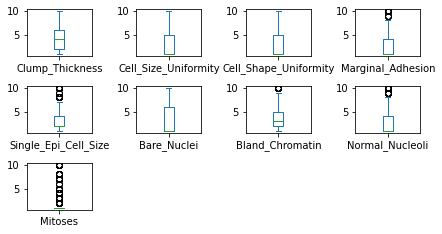

In [9]:
# analyse the data visually, box and whisker plots
bc_data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

- We can also plot the features (columns) individually using different plot types. For example, we can examine the distribution of mitosis in the dataset: 

<h2 id="plot_mitosis">Task1: Create a histogram plot for mitosis</h2>

- bc_data['Mitoses'] extracts the mitosis column of the dataframe
- Refer to the matplotlib documentation for syntax and examples: 
    - https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.hist.html
    - https://matplotlib.org/stable/gallery/statistics/hist.html


(array([579.,  35.,  33.,  12.,   6.,   3.,   9.,   8.,   0.,  14.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

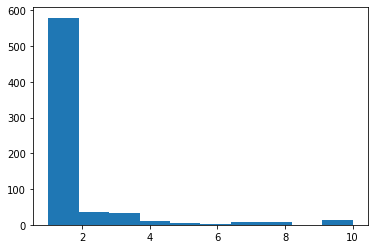

In [11]:
plt.hist(bc_data['Mitoses'])

- In the plot above, we can see that the dataset has relatively low mitosis rates (majority being 1), with few samples having larger rates. 

<h2 id="plot_class">Task 2: Create a pie chart plot to display the class distribution</h2>

   - A basic pie chart requires knowing the feature column and the percentage of each value to be plotted. 
       - bc_data['Class'] extracts the class column of the dataframe
       - value_counts() returns the number of rows in each category of values (in our case, benign and malignant) 
   - You can follow the example on the matplotlib documentation page: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
   

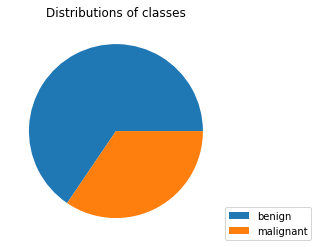

In [20]:
labels = ['benign', 'malignant']

plt.pie(bc_data['Class'].value_counts())
plt.title('Distributions of classes')
plt.legend(loc=(1,0), labels=labels)
plt.show()

<h2 id="preparing_data">Preparing the data for classification</h2>

- The above shows that the outcome variables are 'Benign' and 'Malignant'. 
- For most scikit learn algorithms, the class labels will automatically be transformed into integer form (categorical). This is called label encoding. 
- Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated.
- However, not all algorithms can handle textual data in target variables. 
    - For example, the popular XGBoost algorithm expects integers in its class variables. 
    - i.e. Scikit learn's xgboost implementation does not automatically encode target variables. See this blog post for example: https://machinelearningmastery.com/data-preparation-gradient-boosting-xgboost-python/
    
- For safe and 'generalisable' programming practice, label encoding should be included as n important pre-processing step for the structured dataset in supervised learning.


- The simplest way to encode outcome variables is to directly map the text values to numerical one. 
- The example below maps benign:0 and malignant:1

In [21]:
bc_data.loc[bc_data.Class=='benign','Class'] = 0
bc_data.loc[bc_data.Class=='malignant','Class']=1

In [22]:
bc_data.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


- However, this approach may not be very efficient with multiple class labels (imagine a situation where your class label has 20 distinct values). 
- Scikit learn then comes to the rescue. You can use its LabelEncoder class to automatically map textual labels to numerical ones. 
- LabelEncoder scikit documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

<h2 id="encode_data">Task 3: Encode outcome variables using LabelEncoder</h2>

1. Read the LabelEncoder scikit-learn's documentation and examples to understand how label encoding is performed 
2. Adapt the following code snippet to your data frame and output column to encode the 'Class' variable into numerical form: 

```python

from sklearn.preprocessing import LabelEncoder
cols = ['workex', 'status', 'hsc_s', 'degree_t']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()
```

In [28]:
### Your solution here ###
from sklearn import preprocessing
le = preprocessing.LabelEncoding()
bc_data[['Class']] = le.fit_transform(bc_data[['Class']])

AttributeError: module 'sklearn.preprocessing' has no attribute 'LabelEncoding'

In [27]:
bc_data.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


- Now save your updated dataset to bc_encoded.csv (we will be using this data in the following practicals)


In [58]:
bc_data.to_csv('bc_encoded.csv')